## Model validation on the Iris dataset

In [52]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


<tr>
<td><img src="data/iris_setosa.jpg" alt="Drawing" style="height: 270px;"/></td>
<td><img src="data/iris_versicolor.jpg" alt="Drawing" style="height: 270px;"/></td>
<td><img src="data/iris_virginica.jpg" alt="Drawing" style="height: 270px;"/></td>
</tr>

#### The Iris dataset

In this assignment, you will use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

#### Load and preprocess the data

In [2]:
def read_in_and_split_data(iris_data):
    
    data=iris_data['data']
    targets=iris_data['target']
    train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
    return (train_data, test_data, train_targets, test_targets)

In [3]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [4]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the neural network model


In [16]:
def get_model(input_shape):
      
    model=Sequential([
        Dense(64,activation='relu',kernel_initializer='he_uniform',bias_initializer='ones',input_shape=input_shape),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(3,activation='softmax')
        
    ])
    return model

In [17]:
model = get_model(train_data[0].shape)

#### Compile the model

In [21]:
def compile_model(model):
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    

In [22]:
compile_model(model)

#### Fit the model to the training data

In [33]:
def train_model(model, train_data, train_targets, epochs):
   
    history= model.fit(train_data, train_targets, epochs=epochs,validation_split =0.15,batch_size=40)
    return history

In [34]:
history = train_model(model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 0s 860us/sample - loss: 4.2338e-06 - accuracy: 1.0000 - val_loss: 0.9907 - val_accuracy: 0.9048
Epoch 2/800
114/114 [==============================] - 0s 921us/sample - loss: 4.2369e-06 - accuracy: 1.0000 - val_loss: 0.9916 - val_accuracy: 0.9048
Epoch 3/800
114/114 [==============================] - 0s 2ms/sample - loss: 4.2213e-06 - accuracy: 1.0000 - val_loss: 0.9911 - val_accuracy: 0.9048
Epoch 4/800
114/114 [==============================] - 0s 954us/sample - loss: 4.2411e-06 - accuracy: 1.0000 - val_loss: 0.9907 - val_accuracy: 0.9048
Epoch 5/800
114/114 [==============================] - 0s 900us/sample - loss: 4.1732e-06 - accuracy: 1.0000 - val_loss: 0.9916 - val_accuracy: 0.9048
Epoch 6/800
114/114 [==============================] - 0s 989us/sample - loss: 4.1596e-06 - accuracy: 1.0000 - val_loss: 0.9930 - val_accuracy: 0.9048
Epoch 7/800
114/114 [==============================

Epoch 55/800
114/114 [==============================] - 0s 895us/sample - loss: 3.4831e-06 - accuracy: 1.0000 - val_loss: 1.0134 - val_accuracy: 0.9048
Epoch 56/800
114/114 [==============================] - 0s 2ms/sample - loss: 3.4684e-06 - accuracy: 1.0000 - val_loss: 1.0139 - val_accuracy: 0.9048
Epoch 57/800
114/114 [==============================] - 0s 956us/sample - loss: 3.4632e-06 - accuracy: 1.0000 - val_loss: 1.0138 - val_accuracy: 0.9048
Epoch 58/800
114/114 [==============================] - 0s 882us/sample - loss: 3.4454e-06 - accuracy: 1.0000 - val_loss: 1.0139 - val_accuracy: 0.9048
Epoch 59/800
114/114 [==============================] - 0s 2ms/sample - loss: 3.4266e-06 - accuracy: 1.0000 - val_loss: 1.0146 - val_accuracy: 0.9048
Epoch 60/800
114/114 [==============================] - 0s 901us/sample - loss: 3.4256e-06 - accuracy: 1.0000 - val_loss: 1.0147 - val_accuracy: 0.9048
Epoch 61/800
114/114 [==============================] - 0s 922us/sample - loss: 3.4099e-06 -

114/114 [==============================] - 0s 863us/sample - loss: 2.8965e-06 - accuracy: 1.0000 - val_loss: 1.0338 - val_accuracy: 0.9048
Epoch 110/800
114/114 [==============================] - 0s 910us/sample - loss: 2.9540e-06 - accuracy: 1.0000 - val_loss: 1.0326 - val_accuracy: 0.9048
Epoch 111/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.8693e-06 - accuracy: 1.0000 - val_loss: 1.0335 - val_accuracy: 0.9048
Epoch 112/800
114/114 [==============================] - 0s 864us/sample - loss: 2.8588e-06 - accuracy: 1.0000 - val_loss: 1.0344 - val_accuracy: 0.9048
Epoch 113/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.8724e-06 - accuracy: 1.0000 - val_loss: 1.0361 - val_accuracy: 0.9048
Epoch 114/800
114/114 [==============================] - 0s 902us/sample - loss: 2.8651e-06 - accuracy: 1.0000 - val_loss: 1.0358 - val_accuracy: 0.9048
Epoch 115/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.8296e-06 - accuracy

Epoch 163/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.4469e-06 - accuracy: 1.0000 - val_loss: 1.0530 - val_accuracy: 0.9048
Epoch 164/800
114/114 [==============================] - 0s 936us/sample - loss: 2.4594e-06 - accuracy: 1.0000 - val_loss: 1.0548 - val_accuracy: 0.9048
Epoch 165/800
114/114 [==============================] - 0s 891us/sample - loss: 2.4395e-06 - accuracy: 1.0000 - val_loss: 1.0540 - val_accuracy: 0.9048
Epoch 166/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.4364e-06 - accuracy: 1.0000 - val_loss: 1.0532 - val_accuracy: 0.9048
Epoch 167/800
114/114 [==============================] - 0s 897us/sample - loss: 2.3977e-06 - accuracy: 1.0000 - val_loss: 1.0538 - val_accuracy: 0.9048
Epoch 168/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.3873e-06 - accuracy: 1.0000 - val_loss: 1.0543 - val_accuracy: 0.9048
Epoch 169/800
114/114 [==============================] - 0s 906us/sample - loss: 2.3967e

Epoch 217/800
114/114 [==============================] - 0s 885us/sample - loss: 2.0673e-06 - accuracy: 1.0000 - val_loss: 1.0725 - val_accuracy: 0.9048
Epoch 218/800
114/114 [==============================] - 0s 1ms/sample - loss: 2.0736e-06 - accuracy: 1.0000 - val_loss: 1.0716 - val_accuracy: 0.9048
Epoch 219/800
114/114 [==============================] - 0s 878us/sample - loss: 2.0537e-06 - accuracy: 1.0000 - val_loss: 1.0717 - val_accuracy: 0.9048
Epoch 220/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.0432e-06 - accuracy: 1.0000 - val_loss: 1.0727 - val_accuracy: 0.9048
Epoch 221/800
114/114 [==============================] - 0s 912us/sample - loss: 2.0370e-06 - accuracy: 1.0000 - val_loss: 1.0733 - val_accuracy: 0.9048
Epoch 222/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.0296e-06 - accuracy: 1.0000 - val_loss: 1.0739 - val_accuracy: 0.9048
Epoch 223/800
114/114 [==============================] - 0s 1ms/sample - loss: 2.0307e-0

Epoch 271/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.7797e-06 - accuracy: 1.0000 - val_loss: 1.0894 - val_accuracy: 0.9048
Epoch 272/800
114/114 [==============================] - 0s 895us/sample - loss: 1.7693e-06 - accuracy: 1.0000 - val_loss: 1.0902 - val_accuracy: 0.9048
Epoch 273/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.7620e-06 - accuracy: 1.0000 - val_loss: 1.0904 - val_accuracy: 0.9048
Epoch 274/800
114/114 [==============================] - 0s 990us/sample - loss: 1.7599e-06 - accuracy: 1.0000 - val_loss: 1.0900 - val_accuracy: 0.9048
Epoch 275/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.7536e-06 - accuracy: 1.0000 - val_loss: 1.0905 - val_accuracy: 0.9048
Epoch 276/800
114/114 [==============================] - 0s 1ms/sample - loss: 1.7431e-06 - accuracy: 1.0000 - val_loss: 1.0907 - val_accuracy: 0.9048
Epoch 277/800
114/114 [==============================] - 0s 853us/sample - loss: 1.7431e-0

Epoch 325/800
114/114 [==============================] - 0s 911us/sample - loss: 1.5246e-06 - accuracy: 1.0000 - val_loss: 1.1046 - val_accuracy: 0.9048
Epoch 326/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.5361e-06 - accuracy: 1.0000 - val_loss: 1.1043 - val_accuracy: 0.9048
Epoch 327/800
114/114 [==============================] - 0s 942us/sample - loss: 1.5215e-06 - accuracy: 1.0000 - val_loss: 1.1051 - val_accuracy: 0.9048
Epoch 328/800
114/114 [==============================] - 0s 894us/sample - loss: 1.5131e-06 - accuracy: 1.0000 - val_loss: 1.1063 - val_accuracy: 0.9048
Epoch 329/800
114/114 [==============================] - 0s 974us/sample - loss: 1.5100e-06 - accuracy: 1.0000 - val_loss: 1.1068 - val_accuracy: 0.9048
Epoch 330/800
114/114 [==============================] - 0s 878us/sample - loss: 1.5236e-06 - accuracy: 1.0000 - val_loss: 1.1078 - val_accuracy: 0.9048
Epoch 331/800
114/114 [==============================] - 0s 899us/sample - loss: 1.5

Epoch 379/800
114/114 [==============================] - 0s 903us/sample - loss: 1.3270e-06 - accuracy: 1.0000 - val_loss: 1.1201 - val_accuracy: 0.9048
Epoch 380/800
114/114 [==============================] - 0s 885us/sample - loss: 1.3259e-06 - accuracy: 1.0000 - val_loss: 1.1203 - val_accuracy: 0.9048
Epoch 381/800
114/114 [==============================] - 0s 1ms/sample - loss: 1.3270e-06 - accuracy: 1.0000 - val_loss: 1.1213 - val_accuracy: 0.9048
Epoch 382/800
114/114 [==============================] - 0s 920us/sample - loss: 1.3196e-06 - accuracy: 1.0000 - val_loss: 1.1211 - val_accuracy: 0.9048
Epoch 383/800
114/114 [==============================] - 0s 982us/sample - loss: 1.3155e-06 - accuracy: 1.0000 - val_loss: 1.1213 - val_accuracy: 0.9048
Epoch 384/800
114/114 [==============================] - 0s 977us/sample - loss: 1.3155e-06 - accuracy: 1.0000 - val_loss: 1.1220 - val_accuracy: 0.9048
Epoch 385/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.314

Epoch 433/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.1607e-06 - accuracy: 1.0000 - val_loss: 1.1348 - val_accuracy: 0.9048
Epoch 434/800
114/114 [==============================] - 0s 916us/sample - loss: 1.1555e-06 - accuracy: 1.0000 - val_loss: 1.1353 - val_accuracy: 0.9048
Epoch 435/800
114/114 [==============================] - 0s 884us/sample - loss: 1.1628e-06 - accuracy: 1.0000 - val_loss: 1.1364 - val_accuracy: 0.9048
Epoch 436/800
114/114 [==============================] - 0s 894us/sample - loss: 1.1513e-06 - accuracy: 1.0000 - val_loss: 1.1363 - val_accuracy: 0.9048
Epoch 437/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.1513e-06 - accuracy: 1.0000 - val_loss: 1.1366 - val_accuracy: 0.9048
Epoch 438/800
114/114 [==============================] - 0s 907us/sample - loss: 1.1440e-06 - accuracy: 1.0000 - val_loss: 1.1362 - val_accuracy: 0.9048
Epoch 439/800
114/114 [==============================] - 0s 885us/sample - loss: 1.152

Epoch 487/800
114/114 [==============================] - 0s 897us/sample - loss: 1.0185e-06 - accuracy: 1.0000 - val_loss: 1.1491 - val_accuracy: 0.9048
Epoch 488/800
114/114 [==============================] - 0s 1ms/sample - loss: 1.0185e-06 - accuracy: 1.0000 - val_loss: 1.1493 - val_accuracy: 0.9048
Epoch 489/800
114/114 [==============================] - 0s 901us/sample - loss: 1.0154e-06 - accuracy: 1.0000 - val_loss: 1.1497 - val_accuracy: 0.9048
Epoch 490/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.0133e-06 - accuracy: 1.0000 - val_loss: 1.1500 - val_accuracy: 0.9048
Epoch 491/800
114/114 [==============================] - 0s 905us/sample - loss: 1.0080e-06 - accuracy: 1.0000 - val_loss: 1.1506 - val_accuracy: 0.9048
Epoch 492/800
114/114 [==============================] - 0s 881us/sample - loss: 1.0154e-06 - accuracy: 1.0000 - val_loss: 1.1505 - val_accuracy: 0.9048
Epoch 493/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.0070e

Epoch 541/800
114/114 [==============================] - 0s 990us/sample - loss: 9.0243e-07 - accuracy: 1.0000 - val_loss: 1.1644 - val_accuracy: 0.9048
Epoch 542/800
114/114 [==============================] - 0s 2ms/sample - loss: 8.9929e-07 - accuracy: 1.0000 - val_loss: 1.1644 - val_accuracy: 0.9048
Epoch 543/800
114/114 [==============================] - 0s 969us/sample - loss: 8.9824e-07 - accuracy: 1.0000 - val_loss: 1.1648 - val_accuracy: 0.9048
Epoch 544/800
114/114 [==============================] - 0s 2ms/sample - loss: 8.9615e-07 - accuracy: 1.0000 - val_loss: 1.1649 - val_accuracy: 0.9048
Epoch 545/800
114/114 [==============================] - 0s 943us/sample - loss: 8.9092e-07 - accuracy: 1.0000 - val_loss: 1.1646 - val_accuracy: 0.9048
Epoch 546/800
114/114 [==============================] - 0s 2ms/sample - loss: 8.8883e-07 - accuracy: 1.0000 - val_loss: 1.1648 - val_accuracy: 0.9048
Epoch 547/800
114/114 [==============================] - 0s 995us/sample - loss: 8.8883e

Epoch 595/800
114/114 [==============================] - 0s 903us/sample - loss: 7.9472e-07 - accuracy: 1.0000 - val_loss: 1.1779 - val_accuracy: 0.9048
Epoch 596/800
114/114 [==============================] - 0s 890us/sample - loss: 7.9263e-07 - accuracy: 1.0000 - val_loss: 1.1780 - val_accuracy: 0.9048
Epoch 597/800
114/114 [==============================] - 0s 2ms/sample - loss: 7.9054e-07 - accuracy: 1.0000 - val_loss: 1.1775 - val_accuracy: 0.9048
Epoch 598/800
114/114 [==============================] - 0s 898us/sample - loss: 7.9158e-07 - accuracy: 1.0000 - val_loss: 1.1775 - val_accuracy: 0.9048
Epoch 599/800
114/114 [==============================] - 0s 893us/sample - loss: 7.9472e-07 - accuracy: 1.0000 - val_loss: 1.1773 - val_accuracy: 0.9048
Epoch 600/800
114/114 [==============================] - 0s 2ms/sample - loss: 7.8636e-07 - accuracy: 1.0000 - val_loss: 1.1781 - val_accuracy: 0.9048
Epoch 601/800
114/114 [==============================] - 0s 885us/sample - loss: 7.874

Epoch 649/800
114/114 [==============================] - 0s 2ms/sample - loss: 7.0688e-07 - accuracy: 1.0000 - val_loss: 1.1907 - val_accuracy: 0.9048
Epoch 650/800
114/114 [==============================] - 0s 915us/sample - loss: 7.0479e-07 - accuracy: 1.0000 - val_loss: 1.1914 - val_accuracy: 0.9048
Epoch 651/800
114/114 [==============================] - 0s 2ms/sample - loss: 7.0270e-07 - accuracy: 1.0000 - val_loss: 1.1916 - val_accuracy: 0.9048
Epoch 652/800
114/114 [==============================] - 0s 967us/sample - loss: 7.0479e-07 - accuracy: 1.0000 - val_loss: 1.1910 - val_accuracy: 0.9048
Epoch 653/800
114/114 [==============================] - 0s 902us/sample - loss: 7.0375e-07 - accuracy: 1.0000 - val_loss: 1.1919 - val_accuracy: 0.9048
Epoch 654/800
114/114 [==============================] - 0s 987us/sample - loss: 7.0166e-07 - accuracy: 1.0000 - val_loss: 1.1925 - val_accuracy: 0.9048
Epoch 655/800
114/114 [==============================] - 0s 894us/sample - loss: 6.985

Epoch 703/800
114/114 [==============================] - 0s 2ms/sample - loss: 6.2846e-07 - accuracy: 1.0000 - val_loss: 1.2045 - val_accuracy: 0.9048
Epoch 704/800
114/114 [==============================] - 0s 959us/sample - loss: 6.2846e-07 - accuracy: 1.0000 - val_loss: 1.2050 - val_accuracy: 0.9048
Epoch 705/800
114/114 [==============================] - 0s 902us/sample - loss: 6.2428e-07 - accuracy: 1.0000 - val_loss: 1.2049 - val_accuracy: 0.9048
Epoch 706/800
114/114 [==============================] - 0s 1ms/sample - loss: 6.2218e-07 - accuracy: 1.0000 - val_loss: 1.2047 - val_accuracy: 0.9048
Epoch 707/800
114/114 [==============================] - 0s 855us/sample - loss: 6.2114e-07 - accuracy: 1.0000 - val_loss: 1.2042 - val_accuracy: 0.9048
Epoch 708/800
114/114 [==============================] - 0s 2ms/sample - loss: 6.2323e-07 - accuracy: 1.0000 - val_loss: 1.2048 - val_accuracy: 0.9048
Epoch 709/800
114/114 [==============================] - 0s 1ms/sample - loss: 6.2009e-0

Epoch 757/800
114/114 [==============================] - 0s 921us/sample - loss: 5.6781e-07 - accuracy: 1.0000 - val_loss: 1.2158 - val_accuracy: 0.9048
Epoch 758/800
114/114 [==============================] - 0s 2ms/sample - loss: 5.6258e-07 - accuracy: 1.0000 - val_loss: 1.2170 - val_accuracy: 0.9048
Epoch 759/800
114/114 [==============================] - 0s 912us/sample - loss: 5.6153e-07 - accuracy: 1.0000 - val_loss: 1.2177 - val_accuracy: 0.9048
Epoch 760/800
114/114 [==============================] - 0s 905us/sample - loss: 5.6049e-07 - accuracy: 1.0000 - val_loss: 1.2177 - val_accuracy: 0.9048
Epoch 761/800
114/114 [==============================] - 0s 2ms/sample - loss: 5.5944e-07 - accuracy: 1.0000 - val_loss: 1.2172 - val_accuracy: 0.9048
Epoch 762/800
114/114 [==============================] - 0s 883us/sample - loss: 5.5631e-07 - accuracy: 1.0000 - val_loss: 1.2174 - val_accuracy: 0.9048
Epoch 763/800
114/114 [==============================] - 0s 889us/sample - loss: 5.552

#### Plot the learning curves

* Epoch vs accuracy
* Epoch vs loss


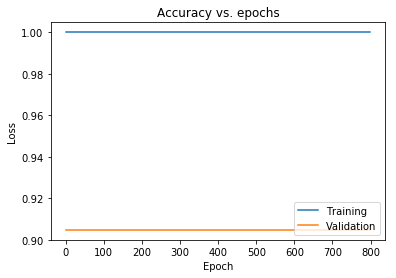

In [35]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

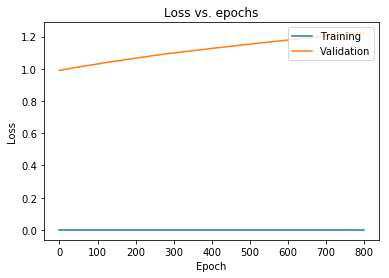

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Have overfit our dataset. mitigate this overfitting.

#### Reducing overfitting in the model

You should now define a new regularised model.
The specs for the regularised model are the same as the original model, with the addition of two dropout layers, weight decay, and a batch normalisation layer. 

In [46]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    
    model = Sequential([
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay), kernel_initializer='he_uniform', bias_initializer='ones', input_shape=input_shape),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dropout(dropout_rate),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      BatchNormalization(),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dropout(dropout_rate),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(3, activation='softmax')
    ])
    
    return model

#### Instantiate, compile and train the model

In [47]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [48]:
compile_model(reg_model)

In [49]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 3s 26ms/sample - loss: 1.9735 - accuracy: 0.3509 - val_loss: 1.9884 - val_accuracy: 0.4286
Epoch 2/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.0197 - accuracy: 0.2982 - val_loss: 1.9764 - val_accuracy: 0.4286
Epoch 3/800
114/114 [==============================] - 0s 930us/sample - loss: 2.0016 - accuracy: 0.2982 - val_loss: 1.9666 - val_accuracy: 0.4286
Epoch 4/800
114/114 [==============================] - 0s 2ms/sample - loss: 2.0069 - accuracy: 0.3596 - val_loss: 1.9576 - val_accuracy: 0.4286
Epoch 5/800
114/114 [==============================] - 0s 949us/sample - loss: 2.0008 - accuracy: 0.3509 - val_loss: 1.9496 - val_accuracy: 0.4286
Epoch 6/800
114/114 [==============================] - 0s 2ms/sample - loss: 1.9864 - accuracy: 0.3158 - val_loss: 1.9423 - val_accuracy: 0.4286
Epoch 7/800
114/114 [==============================] - 0s 951us/sample - loss: 1

114/114 [==============================] - 0s 2ms/sample - loss: 0.9931 - accuracy: 0.9211 - val_loss: 1.0729 - val_accuracy: 0.9524
Epoch 112/800
114/114 [==============================] - 0s 921us/sample - loss: 0.9648 - accuracy: 0.9298 - val_loss: 1.0551 - val_accuracy: 0.9048
Epoch 113/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.9388 - accuracy: 0.9561 - val_loss: 1.0500 - val_accuracy: 0.9048
Epoch 114/800
114/114 [==============================] - 0s 942us/sample - loss: 0.9579 - accuracy: 0.9649 - val_loss: 1.0423 - val_accuracy: 0.9048
Epoch 115/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.9821 - accuracy: 0.9211 - val_loss: 1.0470 - val_accuracy: 0.9524
Epoch 116/800
114/114 [==============================] - 0s 960us/sample - loss: 0.9316 - accuracy: 0.9737 - val_loss: 1.0707 - val_accuracy: 0.9524
Epoch 117/800
114/114 [==============================] - 0s 912us/sample - loss: 0.9247 - accuracy: 0.9561 - val_loss: 1.0879 

114/114 [==============================] - 0s 891us/sample - loss: 0.8106 - accuracy: 0.9561 - val_loss: 0.9836 - val_accuracy: 0.9048
Epoch 222/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.7459 - accuracy: 0.9825 - val_loss: 0.9837 - val_accuracy: 0.9048
Epoch 223/800
114/114 [==============================] - 0s 915us/sample - loss: 0.7721 - accuracy: 0.9561 - val_loss: 0.9737 - val_accuracy: 0.9048
Epoch 224/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.7534 - accuracy: 0.9825 - val_loss: 0.9449 - val_accuracy: 0.9048
Epoch 225/800
114/114 [==============================] - 0s 936us/sample - loss: 0.7161 - accuracy: 1.0000 - val_loss: 0.9285 - val_accuracy: 0.9048
Epoch 226/800
114/114 [==============================] - 0s 945us/sample - loss: 0.7317 - accuracy: 0.9825 - val_loss: 0.9281 - val_accuracy: 0.9048
Epoch 227/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.7382 - accuracy: 0.9825 - val_loss: 0.9506 

114/114 [==============================] - 0s 957us/sample - loss: 0.6714 - accuracy: 0.9912 - val_loss: 1.0141 - val_accuracy: 0.9048
Epoch 332/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.7109 - accuracy: 0.9737 - val_loss: 1.0219 - val_accuracy: 0.9048
Epoch 333/800
114/114 [==============================] - 0s 965us/sample - loss: 0.6661 - accuracy: 1.0000 - val_loss: 1.0195 - val_accuracy: 0.9048
Epoch 334/800
114/114 [==============================] - 0s 902us/sample - loss: 0.6627 - accuracy: 1.0000 - val_loss: 1.0133 - val_accuracy: 0.9048
Epoch 335/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.7020 - accuracy: 0.9825 - val_loss: 0.9901 - val_accuracy: 0.9048
Epoch 336/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.6606 - accuracy: 1.0000 - val_loss: 0.9832 - val_accuracy: 0.9048
Epoch 337/800
114/114 [==============================] - 0s 955us/sample - loss: 0.6795 - accuracy: 0.9737 - val_loss: 0.9542 

114/114 [==============================] - 0s 2ms/sample - loss: 0.6239 - accuracy: 0.9825 - val_loss: 0.9890 - val_accuracy: 0.9048
Epoch 442/800
114/114 [==============================] - 0s 945us/sample - loss: 0.6322 - accuracy: 0.9912 - val_loss: 0.9630 - val_accuracy: 0.9048
Epoch 443/800
114/114 [==============================] - 0s 939us/sample - loss: 0.6180 - accuracy: 0.9912 - val_loss: 0.9102 - val_accuracy: 0.9048
Epoch 444/800
114/114 [==============================] - 0s 965us/sample - loss: 0.6202 - accuracy: 0.9912 - val_loss: 0.8934 - val_accuracy: 0.9048
Epoch 445/800
114/114 [==============================] - 0s 911us/sample - loss: 0.6721 - accuracy: 0.9737 - val_loss: 0.8799 - val_accuracy: 0.9524
Epoch 446/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.6560 - accuracy: 0.9912 - val_loss: 0.9067 - val_accuracy: 0.9048
Epoch 447/800
114/114 [==============================] - 0s 927us/sample - loss: 0.6153 - accuracy: 1.0000 - val_loss: 0.924

114/114 [==============================] - 0s 964us/sample - loss: 0.5698 - accuracy: 1.0000 - val_loss: 0.9377 - val_accuracy: 0.9048
Epoch 552/800
114/114 [==============================] - 0s 930us/sample - loss: 0.5746 - accuracy: 1.0000 - val_loss: 0.9364 - val_accuracy: 0.9048
Epoch 553/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.5772 - accuracy: 0.9912 - val_loss: 0.9565 - val_accuracy: 0.9048
Epoch 554/800
114/114 [==============================] - 0s 872us/sample - loss: 0.5888 - accuracy: 0.9912 - val_loss: 0.9844 - val_accuracy: 0.9048
Epoch 555/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.6103 - accuracy: 0.9737 - val_loss: 0.9797 - val_accuracy: 0.9048
Epoch 556/800
114/114 [==============================] - 0s 971us/sample - loss: 0.5710 - accuracy: 1.0000 - val_loss: 0.9670 - val_accuracy: 0.9048
Epoch 557/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.5718 - accuracy: 1.0000 - val_loss: 0.9514 

114/114 [==============================] - 0s 1ms/sample - loss: 0.5530 - accuracy: 1.0000 - val_loss: 0.8498 - val_accuracy: 0.9048
Epoch 662/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.5532 - accuracy: 0.9912 - val_loss: 0.8435 - val_accuracy: 0.9048
Epoch 663/800
114/114 [==============================] - 0s 982us/sample - loss: 0.5475 - accuracy: 1.0000 - val_loss: 0.8642 - val_accuracy: 0.9048
Epoch 664/800
114/114 [==============================] - 0s 889us/sample - loss: 0.5513 - accuracy: 0.9912 - val_loss: 0.8616 - val_accuracy: 0.9048
Epoch 665/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.5554 - accuracy: 0.9912 - val_loss: 0.8929 - val_accuracy: 0.9048
Epoch 666/800
114/114 [==============================] - 0s 913us/sample - loss: 0.5383 - accuracy: 1.0000 - val_loss: 0.9081 - val_accuracy: 0.9048
Epoch 667/800
114/114 [==============================] - 0s 977us/sample - loss: 0.5508 - accuracy: 0.9912 - val_loss: 0.8880 

114/114 [==============================] - 0s 926us/sample - loss: 0.5206 - accuracy: 0.9912 - val_loss: 0.8287 - val_accuracy: 0.9524
Epoch 772/800
114/114 [==============================] - 0s 2ms/sample - loss: 0.5168 - accuracy: 1.0000 - val_loss: 0.8293 - val_accuracy: 0.9524
Epoch 773/800
114/114 [==============================] - 0s 935us/sample - loss: 0.5302 - accuracy: 0.9912 - val_loss: 0.8408 - val_accuracy: 0.9048
Epoch 774/800
114/114 [==============================] - 0s 899us/sample - loss: 0.5193 - accuracy: 1.0000 - val_loss: 0.8499 - val_accuracy: 0.9048
Epoch 775/800
114/114 [==============================] - 0s 978us/sample - loss: 0.5113 - accuracy: 1.0000 - val_loss: 0.8419 - val_accuracy: 0.9524
Epoch 776/800
114/114 [==============================] - 0s 916us/sample - loss: 0.5064 - accuracy: 1.0000 - val_loss: 0.8459 - val_accuracy: 0.9524
Epoch 777/800
114/114 [==============================] - 0s 962us/sample - loss: 0.5432 - accuracy: 0.9825 - val_loss: 0.8

#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

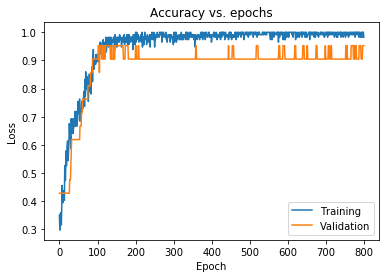

In [50]:
# Plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

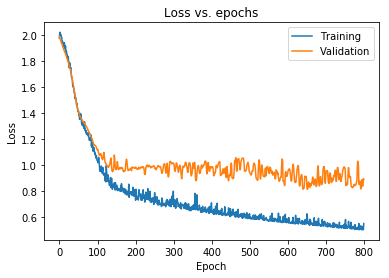

In [51]:
#Plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Regularisation has helped to reduce the overfitting of the network.

In [59]:
def get_callbacks():
   
    early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,mode='min')
    lr_reduce=tf.keras.callbacks.ReduceLROnPlateau(patience=20,factor=0.2)
    return early_stopping,lr_reduce
    

Run the cell below to instantiate and train the regularised model with the callbacks.

In [60]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [61]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for the new model.

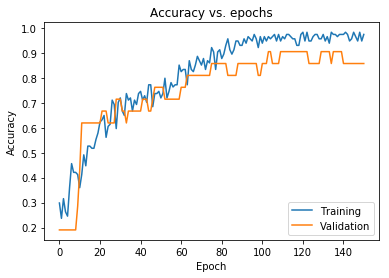

In [62]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

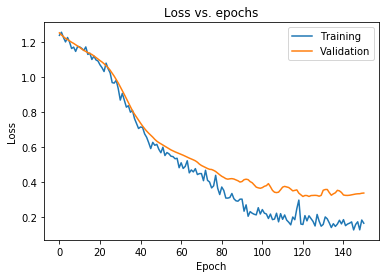

In [63]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [64]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.086
Test accuracy: 100.00%


## Test accuracy: 100%